In [ ]:
!pip install matplotlib-venn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!apt-get -qq install -y libfluidsynth1

E: Package 'libfluidsynth1' has no installation candidate


In [ ]:
# https://pypi.python.org/pypi/libarchive
!apt-get -qq install -y libarchive-dev && pip install -U libarchive
import libarchive

Selecting previously unselected package libarchive-dev:amd64.
(Reading database ... 122531 files and directories currently installed.)
Preparing to unpack .../libarchive-dev_3.4.0-2ubuntu1.2_amd64.deb ...
Unpacking libarchive-dev:amd64 (3.4.0-2ubuntu1.2) ...
Setting up libarchive-dev:amd64 (3.4.0-2ubuntu1.2) ...
Processing triggers for man-db (2.9.1-1) ...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 6.4 MB/s eta 0:00:00
  Created wheel for libarchive: filename=libarchive-0.4.7-py3-none-any.whl size=31629 sha256=5d3519e3c1ee21cc0ca5a6cc4866a26f48b87e7e77a1571ad66a1701b53a7c75
  Stored in directory: /root/.cache/pip/wheels/3a/94/d0/6cd83c8a80a4236fd4cb2a1fd846ecf72ab1e0ac238c5951c0
Successfully built libarchive


In [ ]:
# https://pypi.python.org/pypi/pydot
!apt-get -qq install -y graphviz && pip install pydot
import pydot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.0-py2.py3-none-any.whl size=311317130 sha256=060c37815f8f47dafb992c9a4bf9361eb0be97d1c3dcea42f9906d2d5ab9c8d2
  Stored in directory: /root/.cache/pip/wheels/7b/1b/4b/3363a1d04368e7ff0d408e57ff57966fcdf00583774e761327
Successfully built pyspark


In [ ]:
import pandas as pd
from pyspark.mllib.clustering import KMeans, KMeansModel
from numpy import array

In [ ]:
adclicksDF = pd.read_csv('./game-clicks.csv')
adclicksDF = adclicksDF.rename(columns=lambda x: x.strip())

In [ ]:
adclicksDF.head(n=5)

,timestamp,clickId,userId,userSessionId,isHit,teamId,teamLevel
0,2016-05-26 15:06:55,105,1038,5916,0,25,1
1,2016-05-26 15:07:09,154,1099,5898,0,44,1
2,2016-05-26 15:07:14,229,899,5757,0,71,1
3,2016-05-26 15:07:14,322,2197,5854,0,99,1
4,2016-05-26 15:07:20,22,1362,5739,0,13,1


In [ ]:
adclicksDF['adCount'] = 1


In [ ]:
adclicksDF.head(n=5)


,timestamp,clickId,userId,userSessionId,isHit,teamId,teamLevel,adCount
0,2016-05-26 15:06:55,105,1038,5916,0,25,1,1
1,2016-05-26 15:07:09,154,1099,5898,0,44,1,1
2,2016-05-26 15:07:14,229,899,5757,0,71,1,1
3,2016-05-26 15:07:14,322,2197,5854,0,99,1,1
4,2016-05-26 15:07:20,22,1362,5739,0,13,1,1


In [ ]:
buyclicksDF = pd.read_csv('./buy-clicks.csv')
buyclicksDF = buyclicksDF.rename(columns=lambda x: x.strip()) #removes whitespaces from headers

In [ ]:
buyclicksDF.head(n=5)

,timestamp,txId,userSessionId,team,userId,buyId,price
0,2016-05-26 15:36:54,6004,5820,9,1300,2,3.0
1,2016-05-26 15:36:54,6005,5775,35,868,4,10.0
2,2016-05-26 15:36:54,6006,5679,97,819,5,20.0
3,2016-05-26 16:36:54,6067,5665,18,121,2,3.0
4,2016-05-26 17:06:54,6093,5709,11,2222,5,20.0


In [ ]:
userPurchases = buyclicksDF[['userId','price']] #select only userid and price
userPurchases.head(n=5)

,userId,price
0,1300,3.0
1,868,10.0
2,819,20.0
3,121,3.0
4,2222,20.0


In [ ]:
useradClicks = adclicksDF[['userId','adCount']]

In [ ]:
useradClicks.head(n=5) #as we saw before, this line displays first five lines

,userId,adCount
0,1038,1
1,1099,1
2,899,1
3,2197,1
4,1362,1


In [ ]:
adsPerUser = useradClicks.groupby('userId').sum()
adsPerUser = adsPerUser.reset_index()
adsPerUser.columns = ['userId', 'totalAdClicks'] #rename the columns

In [ ]:

adsPerUser.head(n=5)

,userId,totalAdClicks
0,0,1355
1,1,716
2,2,231
3,6,151
4,8,380


In [ ]:

revenuePerUser = userPurchases.groupby('userId').sum()
revenuePerUser = revenuePerUser.reset_index()
revenuePerUser.columns = ['userId', 'revenue'] #rename the columns

In [ ]:

revenuePerUser.head(n=5)

,userId,revenue
0,1,21.0
1,8,53.0
2,9,80.0
3,10,11.0
4,12,215.0


In [ ]:
combinedDF = adsPerUser.merge(revenuePerUser, on='userId') #userId, adCount, price


In [ ]:
combinedDF.head(n=5) #display how the merged table looks


,userId,totalAdClicks,revenue
0,1,716,21.0
1,8,380,53.0
2,9,508,80.0
3,10,3107,11.0
4,12,704,215.0


In [ ]:
trainingDF = combinedDF[['totalAdClicks','revenue']]
trainingDF.head(n=5)

,totalAdClicks,revenue
0,716,21.0
1,380,53.0
2,508,80.0
3,3107,11.0
4,704,215.0


In [ ]:
trainingDF.shape


(546, 2)

In [ ]:
from pyspark.sql import SparkSession,SQLContext

spark = SparkSession.builder.appName("Basics").getOrCreate()
sc=spark.sparkContext
sqlContext = SQLContext(sc)
df = sqlContext.range(0,10)

/usr/local/lib/python3.10/dist-packages/pyspark/sql/context.py:112: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


In [ ]:
SQlContext = SQLContext(sc)
pDF = sqlContext.createDataFrame(trainingDF)
parsedData = pDF.rdd.map(lambda line: array([line[0], line[1]])) #totalAdClicks, revenue

In [ ]:
help(KMeans.train)

Help on method train in module pyspark.mllib.clustering:

train(rdd: pyspark.rdd.RDD[ForwardRef('VectorLike')], k: int, maxIterations: int = 100, initializationMode: str = 'k-means||', seed: Optional[int] = None, initializationSteps: int = 2, epsilon: float = 0.0001, initialModel: Optional[pyspark.mllib.clustering.KMeansModel] = None, distanceMeasure: str = 'euclidean') -> 'KMeansModel' method of builtins.type instance
    Train a k-means clustering model.
    
    .. versionadded:: 0.9.0
    
    Parameters
    ----------
    rdd : ::py:class:`pyspark.RDD`
        Training points as an `RDD` of :py:class:`pyspark.mllib.linalg.Vector`
        or convertible sequence types.
    k : int
        Number of clusters to create.
    maxIterations : int, optional
        Maximum number of iterations allowed.
        (default: 100)
    initializationMode : str, optional
        The initialization algorithm. This can be either "random" or
        "k-means||".
        (default: "k-means||")
    s

In [ ]:
my_kmmodel = KMeans.train(parsedData, 2, maxIterations=10, initializationMode="random")

In [ ]:
print(my_kmmodel.centers)

[array([544.12373225,  39.35496957]), array([2186.45283019,   37.83018868])]


In [ ]:
!pip install matplotlib
import matplotlib.pyplot as plt


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
cluster_centers = my_kmmodel.centers


In [ ]:
x_centers = [center[0] for center in cluster_centers]
y_centers = [center[1] for center in cluster_centers]


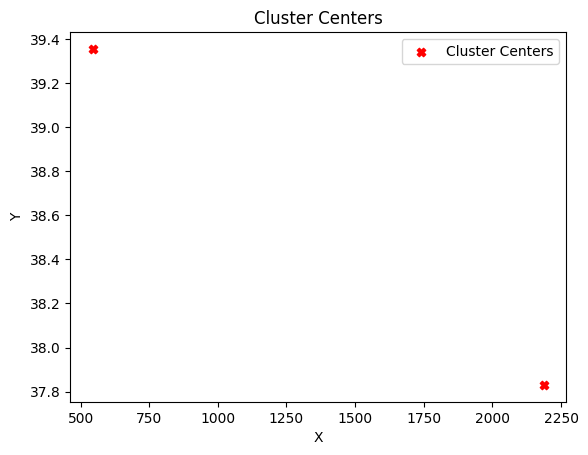

In [ ]:
plt.scatter(x_centers, y_centers, color='red', marker='X', label='Cluster Centers')

# Set labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Cluster Centers')

# Add legend
plt.legend()

# Display the plot
plt.show()
